In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def find_files(folder_path, file_extension):
    csv_files = []

    for csv_file in (os.scandir(folder_path)):
        if csv_file.path.endswith(file_extension):
            csv_files.append(csv_file)
    
    return csv_files

In [4]:
def two_labels_behaviours(df):
    
    snout1 = df.iloc[3:,[1,2]]
    rightear1 = df.iloc[3:,[4,5]]
    leftear1 = df.iloc[3:,[7,8]]
    dorsal1 = df.iloc[3:,[10,11]]
    thoracic1 = df.iloc[3:,[13,14]]
    lumbar1 = df.iloc[3:,[16,17]]
    tail1 = df.iloc[3:,[19,20]]
    snout2 = df.iloc[3:,[22,23]]
    rightear2 = df.iloc[3:,[25,26]]
    leftear2 = df.iloc[3:,[28,29]]
    dorsal2 = df.iloc[3:,[31,32]]
    thoracic2 = df.iloc[3:,[34,35]]
    lumbar2 = df.iloc[3:,[37,38]]
    tail2 = df.iloc[3:,[40,41]]
    
    #all combinations of behaviours of interest
    two_labels = [[snout1, snout2], [snout1, rightear2], [snout1, leftear2], [snout1,dorsal2], [snout1,thoracic2], [snout1, lumbar2], [snout1, tail2] ,[rightear1, snout2], [leftear1, snout2], [dorsal1, snout2],  [thoracic1, snout2], [lumbar2, snout2], [tail1, snout2]] 
    plot_titles = ["snout1, snout2", "snout1, rightear2", "snout1, leftear2", "snout1,dorsal2", "snout1,thoracic2", "snout1, lumbar2", "snout1, tail2" ,"rightear1, snout2", "leftear1, snout2", "dorsal1, snout2",  "thoracic1, snout2", "lumbar2, snout2", "tail1, snout2"] 
    
    return two_labels, plot_titles

In [5]:
one_pixel = 0.102 #cm
threshold = 2 #cm

In [127]:
folder_list = ["E8", "GAP", "WT"] #folder names for each group
dirname = r"C:\Users\Hansine\Genotype Groups"
csv_by_genotype = []
results_by_genotype = []

#looping through each folder to find csv_files
for i, folder in enumerate(folder_list):
    group_folder = dirname + "\\" + folder
    current_group_files = find_files(group_folder, '.csv')
    csv_by_genotype.append(current_group_files)
    csv_dfs = []
    #loop within folder to read group csv_files
    for csv_files in current_group_files:
        df = pd.read_csv(csv_files)
        dfs_tuples_from_two_labels_combinations, plot_titles = two_labels_behaviours(df) #all coordinates of each combination per csv_file
        
        combinations_results = []
        
        #loop in csv_file to determine true interactions for each combination 
        for combination in dfs_tuples_from_two_labels_combinations:
            distances = pd.concat([combination[0], combination[1]], axis=1) #create dataframe
            distances['dist_pixels']=np.linalg.norm(combination[0].values.astype(float) - combination[1].values.astype(float), axis=1) #distance between body parts of interest
            distances['dist_cm'] = distances['dist_pixels']*one_pixel #convert to cm
            distances['interaction'] = distances['dist_cm']<threshold #apply threshold
            interactions_true_table = distances.loc[distances["interaction"]== True] #locate points below threshold
            combinations_results.append(interactions_true_table)
        
        csv_dfs.append(combinations_results)
        
    results_by_genotype.append(csv_dfs) #true interactions for all csv_files sepearated into groups [0/1/2 i.e. E8/GAP/WT]

In [189]:
group_counts = [] # occassions where a combination happens in a group. [3groups][13combinations]
# looping through each group
for j, group_results in enumerate(results_by_genotype):
    #print("group ", j)
    results_per_group = np.zeros(len(results_by_genotype[0][0])) # array with the number of occurrencies of each combination
    #looping through each csv per group
    for i, csv_results in enumerate(group_results):
        #print("csv ", i)
        #looping through each combination for each combination per group
        for k, combination in enumerate(csv_results):
            #print("combination ", k)
            results_per_group[k] = results_per_group[k] + len(combination)
        
    
    group_counts.append(results_per_group)

In [190]:
group_counts

[array([  0.,  45.,  22.,  18.,  10., 391.,  16.,  40.,  43.,  19.,  15.,
          0.,   1.]),
 array([  0.,  17.,  78.,  29.,  43., 550.,   8.,  17.,  39.,  25.,  27.,
          0.,   0.]),
 array([  0.,  29.,  44.,  14.,  44., 502.,  13.,  36., 108.,  10.,  27.,
          0.,  19.])]

[group][csv_file][combination][xy coordinates of second_body_part]

### BarPlot

<BarContainer object of 13 artists>

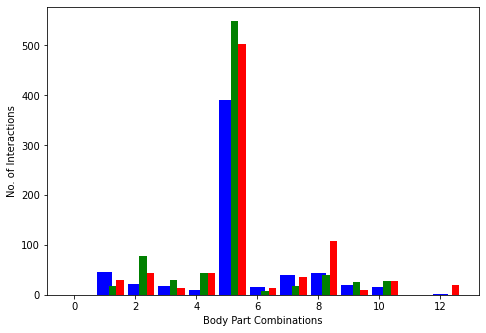

In [203]:
import numpy as np
import matplotlib.pyplot as plt
data = group_counts
#x_values = ["Snout-Snout", "Snout-RightEar", "Snout-LeftEar", "Snout-Dorsal", "Snout-Thoracic", "Snout-Lumbar", "Snout-Tail", "RightEar-Snout", "LeftEar-Snout", "Dorsal-Snout", "Thoracic-Snout", "Lumbar-Snout", "Tail-Snout"]
X = np.arange(13)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel("Body Part Combinations")
plt.ylabel("No. of Interactions")
#plt.xticks(x_values)
ax.bar(X + 0.00, data[0], color = 'b', width = 0.50)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)